<h1 style="color:brown">Supervised Learning: Classification

## K-Nearest Neighbors Algorithm

---

### Introduction

To solve classification problems, the K-nearest neighbors (KNN for short) algorithm is a simple and practical method. This chapter will introduce the K-nearest neighbors algorithm in detail. We will give a Python implementation from the aspects of distance calculation and classification decision. Finally, the K-nearest neighbors algorithm will be used to construct a prediction model and solve the lilac flower classification problem.

### Key Points

- Principle of KNN algorithm<br>
- Common distance algorithm<br>
- Decision rules<br>
- Building prediction models with KNN<br>
- Kd tree<br>
- Implementing KNN with scikit-learn

### Environment

- Python 3.6<br>
- NumPy 1.14.2<br>
- Matplotlab 2.2.2<br>
- Pandas 0.22.0<br>
- scikit-learn 0.19.1

---

## Basics of K-Nearest Neighbors Algorithm

### Nearest Neighbor Algorithm

Before introducing the K-nearest neighbors algorithm, let's first talk about the nearest neighbor (NN) algorithm. It finds the training sample $y$ most similar to $x$ in the training set and uses the category of $y$ as the category of $x$ to achieve the classification aim:

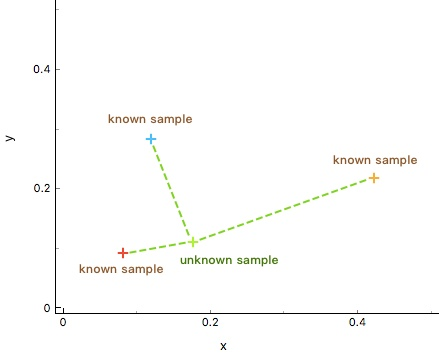

In [1]:
from IPython.display import Image
import os
Image("../input/week4images/K-Nearest Neighbor Algorithm 1.jpeg", width="800px")

As shown in the figure above, by calculating the distance between data $X_{u}$ (unknown sample) and the known categories ${\omega_{1}, \omega_{2}, \omega_{3}}$ (known samples), we judge the similarity between $X_{u}$ and different training sets, and finally determine the category of $X_{u}$. Obviously, it is more appropriate to match the <font color="green">green unknown sample</font> and the <font color="red">red known samples</font>.

### K-Nearest Neighbors Algorithm

The K-Nearest Neighbors (KNN) algorithm is a generalization of the nearest neighbor (NN) algorithm and one of the simplest methods in the machine learning classification algorithm. The core idea of the KNN algorithm is similar to that of the nearest neighbor algorithm, which is classified by finding categories similar to the unknown samples. However, in the NN algorithm, only one sample is used for decision. When the classification is too absolute, the classification effect is poor. To overcome the defect, the KNN algorithm uses K neighboring samples to jointly decide the categories of unknown samples. In this way, the fault tolerance rate in decision-making is much higher than that of the NN algorithm and the classification effect is better.

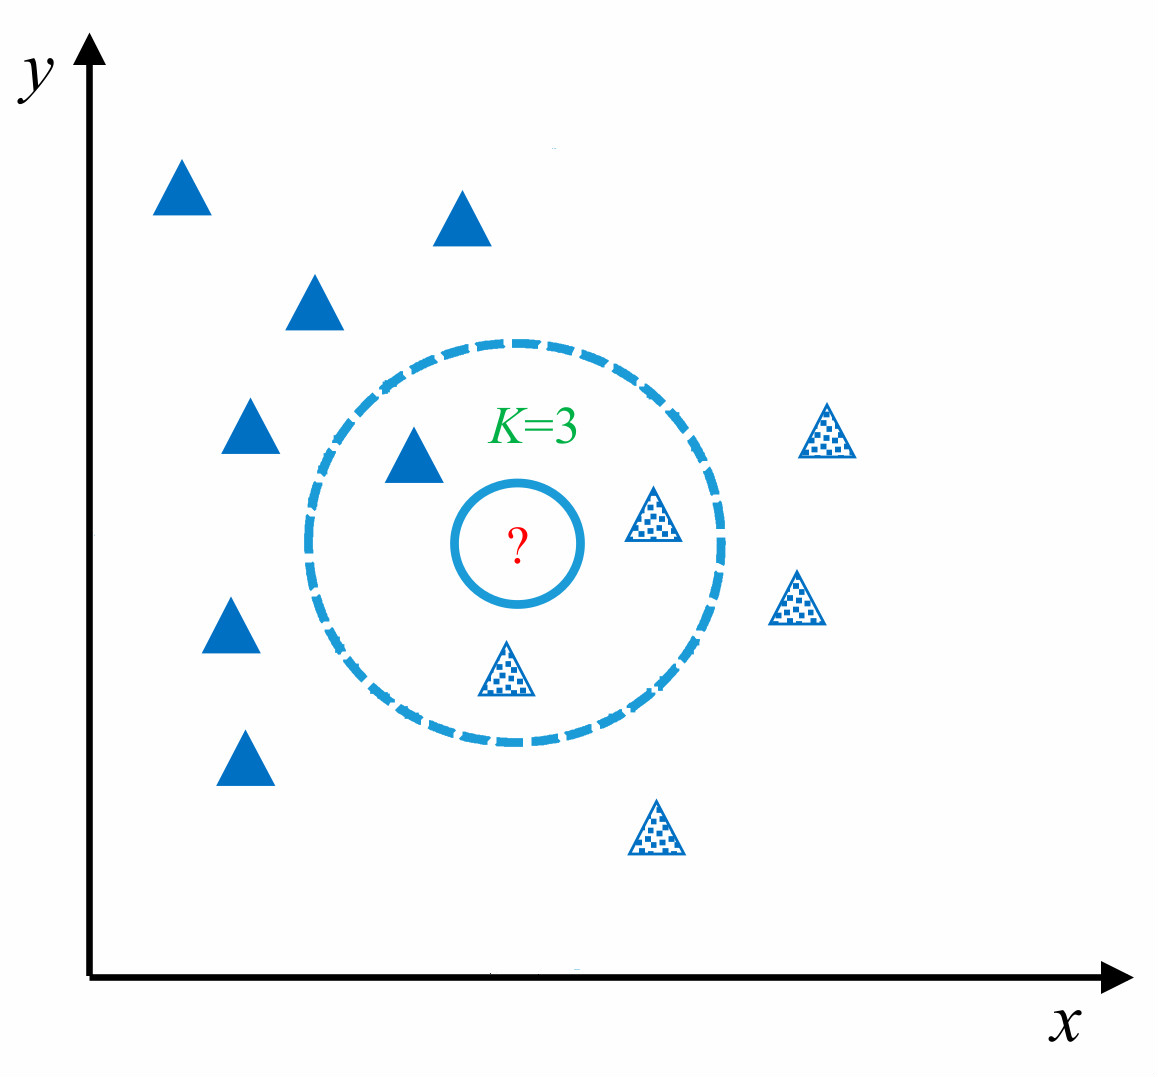

In [2]:
Image("../input/week4images/K-Nearest Neighbor Algorithm 2.jpeg", width="800px")

As shown in the figure above, for the unknown test sample (shown in <font color='red'> ?</font>), the KNN algorithm is used for classification. First calculate the similarity between the unknown sample and the training sample, and then find out the nearest K adjacent samples. (`K` value is `3` in the figure, and <font color='red'>?</font> is circled by K nearest points.) Finally the category of the unknown sample is judged based on the nearest K samples.

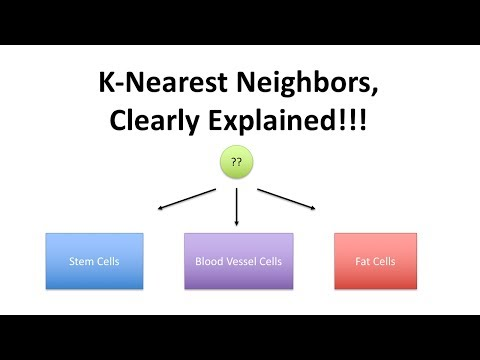

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('HVXime0nQeI', width=800, height=300)

## Implementation of KNN

The KNN algorithm is very mature in theory. Its simple, easy-to-understand ideas and good classification accuracy make it widely adopted. The specific process of the algorithm mainly contains the following four steps:<br>
<br>
1. **Data Preparation**: Through data cleaning, data processing, each piece of data is organized into vectors.<br>
2. **Calculate Distance**: Calculate the distance between test data and training data.<br>
3. **Find Neighbors**: Find the K training data samples closest to the test data.<br>
4. **Decision Classification**: According to the decision rule, the category of test data is obtained from K neighbors.<br>
<br>
See the figure below:

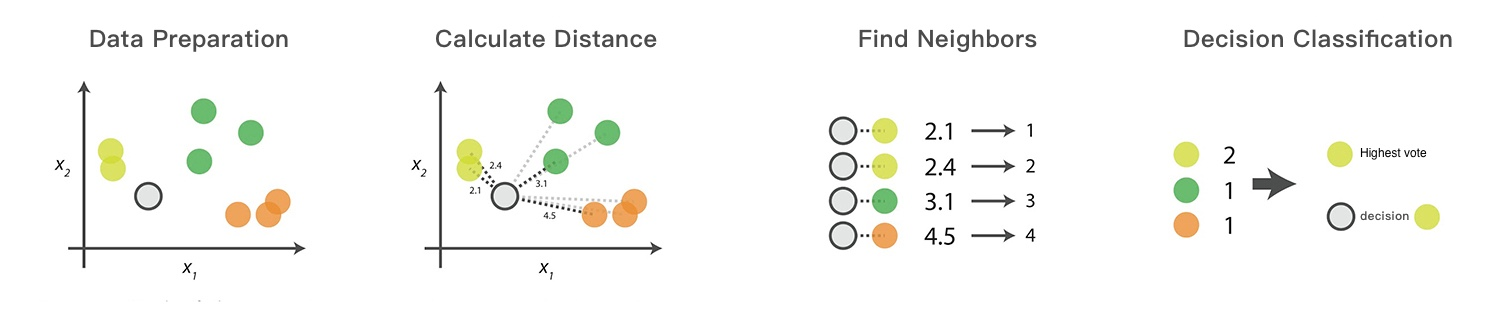

In [4]:
Image("../input/week4images/K-Nearest Neighbor Algorithm 3.jpeg", width="1600px")

In [5]:
import pandas as pd
import numpy as np

### Data Preparation

Below we try to complete a KNN classification process. First we generate a set of sample data with two categories (`A` and `B`), where each piece of data contains two features (`x` and `y`):

In [6]:
"""
Generate a set of sample data
"""

def create_data():
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features, labels

**☞ Exercise:**

Then we try to load and print the data:

In [7]:
'''
Print the data
'''

features, labels = create_data()
print('features: \n',features)
print('labels: \n',labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


To understand the data more intuitively, the dataset is visualized using the **pyplot** package of Matplotlib. For the sake of simplicity, we have used the `map` function and the `lambda` expression to process the data. If you are not familiar with these two methods, you are supposed to earn the corresponding Python knowledge by yourself:

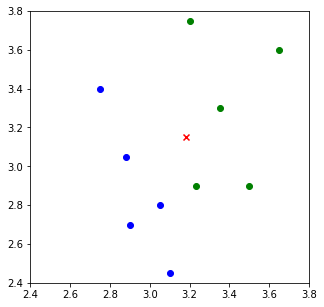

In [8]:
"""
Draw the sample data
"""

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature=list(map(lambda x:x[0],features)) # Return feature x of each data
y_feature=list(map(lambda y:y[1],features)) 
plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
plt.scatter(x_feature[5:],y_feature[5:],c="g") 
plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]

As shown in the figure above, the data with the label `A` (<font color="blue">blue</font> dot) is at the lower left corner, and the data with the label `B` (<font color="green">green</font> dot) is at the upper right corner. We can see the distribution of differently labeled data. The <font color="red">red x point</font> indicates the test data.

### Calculate Distance

When calculating the similarity between two samples, it can be expressed by calculating the distance of the feature values. If the distance between the two samples is larger, it means that the similarity between the two samples is lower. On the contrary, if the distance is smaller, the similarity between the two samples is higher.<br>
<br>
There are many ways to calculate the distance. Here we introduce two most commonly used distance formulas: **Manhattan Distance** and **Euclidean Distance**. The calculations of these two distances are as follows:

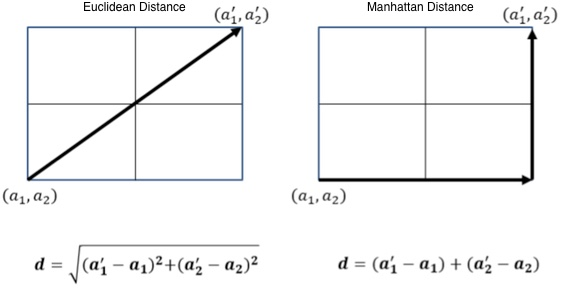

In [9]:
Image("../input/week4images/K-Nearest Neighbor Algorithm 4.jpeg", width="1600px")

#### Manhattan Distance

_Manhattan distance_, also known as _Mahalanobis distance_ and _taxi distance_, is one of the easiest ways to calculate distance. The formula is as follows:<br>
<br>
$$d_{man}=\sum_{i=1}^{N}\left | X_{i}-Y_{i} \right | $$  

We denote:<br>
<br>
- $X$,$Y$: Two data points<br>
- $N$: $N$ features per data<br>
- $X_{i}$: $i$th feature of $X$ <br>
<br>
First we calculate the absolute values of the differences between the corresponding features of $X$ and $Y$, and then add the absolute values to obtain the Manhattan distance:

In [10]:
"""
Manhattan Distance
"""

import numpy as np

def d_man(x, y):
    d = np.sum(np.abs(x - y))
    return d

x = np.array([3.1, 3.2])
print("x:", x)
y = np.array([2.5, 2.8])
print("y:", y)
d_man = d_man(x, y)
print(d_man)

x: [3.1 3.2]
y: [2.5 2.8]
1.0000000000000004


#### Euclidean Distance

_Euclidean distance_ is derived from the distance formula between two points in $N$ dimensions. The expression is as follows:<br>
<br>
$$d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$  <br>
<br>
We denote: <br>
<br>
- $X$,$Y$: Two data points<br>
- $N$: $N$ features per data<br>
- $X_{i}$: $i$th feature of $X$ <br>
<br>
First calculate the squares of the differences between corresponding features of $X$ and $Y$, then sum them up, and finally take square root of the sum. The result so obtained is Euclidean distance:

In [11]:
"""
Euclidean distance
"""

import numpy as np

def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

x = np.random.random(10)  # Randomly generate an array of 10 numbers as the value of x
print("x:", x)
y = np.random.random(10)
print("y:", y)
distance_euc = d_euc(x, y)
print(distance_euc)

x: [0.8170801  0.03176825 0.4937715  0.7945298  0.15848338 0.70080815
 0.71255601 0.16432169 0.63565474 0.48174758]
y: [0.76610272 0.19694307 0.53296013 0.89374113 0.22317953 0.84809786
 0.52408849 0.50242996 0.99648238 0.02991629]
0.7425127683342317


### Decision Rules

After obtaining the similarity between the test sample and the training sample, through the ranking of similarity, K adjacent training samples of each of the test samples can be selected. Then how to judge the final category of the test sample with the help of K neighbors? Decision rules based on data characteristics are discussed below. Different decision rules will produce different prediction results. The most common decision rules are:<br>
<br>
- **Majority voting method**: The majority voting method is similar to the voting process, that is, the category with the most points among the K neighbors is selected as the test sample category.<br>
- **Weighted voting method**: According to the distance, the voting of the neighbors is weighted. Shorter the distance is, the larger the weight is. The class that calculates the maximum value by weight is the category of the test sample.

We recommend the majority voting method here, which is much simpler. You can review the second subsection of this chapter, whose figure is the majority voting method:

In [12]:
"""
Majority voting method
"""

import operator

def majority_voting(class_count):
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count

arr = {'A': 3, 'B': 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In the definition of majority voting, we imported the `operator` calculation module to sort the dictionary type structure. It can be seen from the results that the result returned by the function is `C` with the highest number of votes as `6`.

### Implementation of KNN

After learning the above steps, the KNN algorithm has got clear a bit. The following is a complete implementation of the KNN algorithm. The distance calculation for this experiment uses **Euclidean distance**, the classification decision rule is **majority voting method**, and the function `knn_classify()` is defined, where the parameters of the function include:<br>
<br>
- `test_data`: The input vector used for classification.<br>
- `train_data`: The set of training samples.<br>
- `labels`: The class label vector of the sample data.<br>
- `k`: The number of selected nearest neighbors.

In [13]:
"""
Complete realization of KNN
"""

def knn_classify(test_data, train_data, labels, k):
    distances = np.array([])  # Create an empty array to save the distance
    for each_data in train_data:  # Calculate data similarity using Euclidean distance
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)
    sorted_distance_index = distances.argsort()  # Get the indices sorted by distance
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k]+sorted_distance[k-1])/2  # Calculate the radius
    class_count = {}
    for i in range(k):  # Majority vote
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    final_label = majority_voting(class_count)
    return final_label, r

### Classification Prediction

After implementing the KNN algorithm, we can start classifying our unknown data `[3.18, 3.15]`. Our K value is initially set to 5. Let's look at the performance of this classification:

In [14]:
test_data=np.array([3.18,3.15])
final_label,r=knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

### Visualization

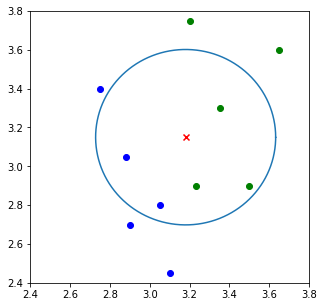

In [15]:
def circle(r, a, b):  # Polar coordinates ：x=r*cosθ，y=r*sinθ.
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature = list(map(lambda x: x[0], features))  # Return feature x of each data
y_feature = list(map(lambda y: y[1], features))
plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
plt.scatter(x_feature[5:],y_feature[5:],c="g") 
plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

As shown in the figure, when the value of `K` is `5`, five training data closest to the test sample (as indicated by the blue circle) include `3` belonging to `B` class while `2` belonging to `A` class, and the data of the test sample is determined according to the majority voting method to be `B` class.

In the KNN algorithm, the choice of K has a great impact on the final decision of the data. Below we introduce the `ipywidgets` module to more clearly reflect the impact of K's choice on the prediction results. The `ipywidgets` module is an interactive module in `jupyter` that allows you to select different K values from the drop-down menu to predict:

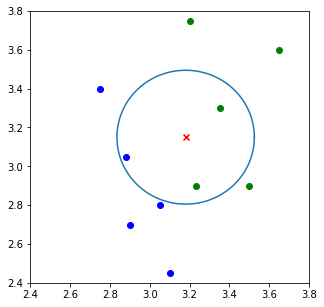

<function __main__.change_k(test_data, features, k)>

In [16]:
from ipywidgets import interact, fixed

def change_k(test_data, features, k):
    final_label, r = knn_classify(test_data, features, labels, k)
    k_circle_x, k_circle_y = circle(r, 3.18, 3.15)
    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))
    x_feature = list(map(lambda x: x[0], features))  # Return feature x of each data
    y_feature = list(map(lambda y: y[1], features))
    plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
    plt.scatter(x_feature[5:],y_feature[5:],c="g") 
    plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]
    plt.plot(k_circle_x, k_circle_y)

interact(change_k, test_data=fixed(test_data),
         features=fixed(features), k=[3, 5, 7, 9])

It can be seen intuitively from the figure that different K values predict different results.

## K-Nearest Neighbors Classification Prediction

Next we use the KNN algorithm to classify and predict real datasets.

### Load Dataset

The dataset used this time is the lilac flower dataset `syringa.csv`, and the lilac dataset contains `3` categories such as `daphne`, `syringa` and `willow`, i.e., labels. Each of these categories contains `50`  data, each containing `4` feature values: **sepal length**, **sepal width**, **petal length** and **petal width**. Let us import it into DataFrame format using Pandas:

In [17]:
"""
Load dataset
"""

import pandas as pd

lilac_data = pd.read_csv("../input/week4data/syringa.csv")
lilac_data.head() # Preview first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,2.4,2.1,daphne
1,4.9,3.0,2.7,1.7,daphne
2,4.7,3.2,2.2,1.4,daphne
3,4.6,3.1,1.6,1.7,daphne
4,5.0,3.6,1.6,1.4,daphne


In order to make us more aware of the data, we also use `plt` to draw the characteristics of each data. Since the lilac flower dataset has four features, it cannot be directly represented in the two-dimensional space, so the feature distribution map can only be drawn by the feature combination. In the following code listing, the four features are combined to obtain six cases and their subgraphs are drawn:

In[ ]:

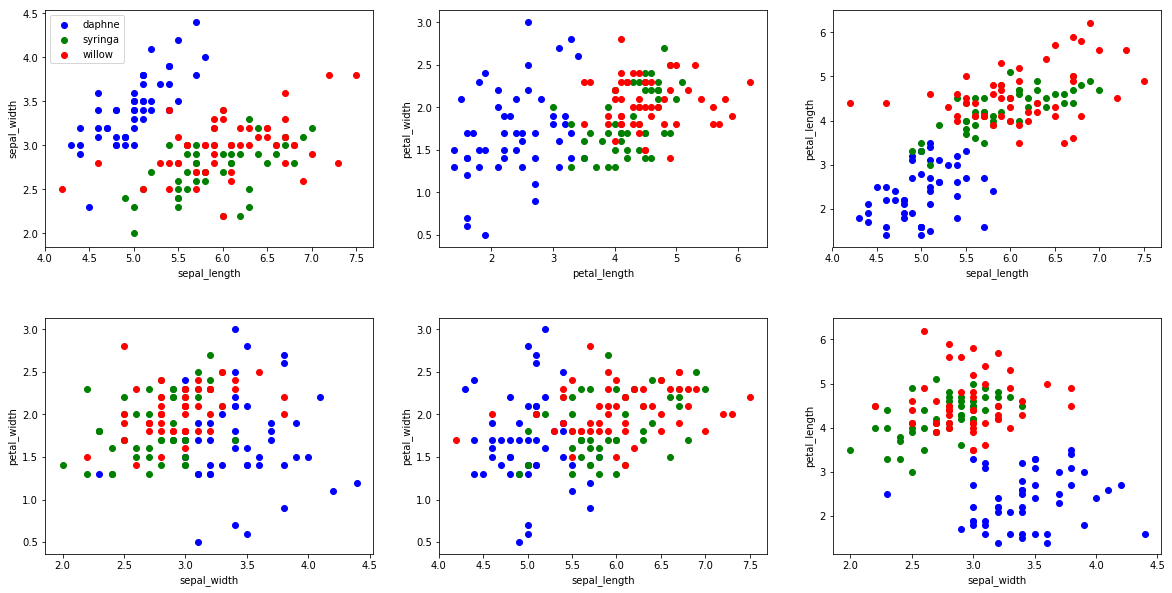

In [18]:
"""
Plot subgraphs of features
"""

fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Build a 2*3 graph space, 2 rows and 3 columns
fig.subplots_adjust(hspace=0.3, wspace=0.2)  # Define height space and width space
axes[0, 0].set_xlabel("sepal_length")  # Define x-axis label
axes[0, 0].set_ylabel("sepal_width")  # Define y-axis label
axes[0, 0].scatter(lilac_data.sepal_length[:50],
                   lilac_data.sepal_width[:50], c="b")
axes[0, 0].scatter(lilac_data.sepal_length[50:100],
                   lilac_data.sepal_width[50:100], c="g")
axes[0, 0].scatter(lilac_data.sepal_length[100:],
                   lilac_data.sepal_width[100:], c="r")
axes[0, 0].legend(["daphne", "syringa", "willow"], loc=2)  # Define sample

axes[0, 1].set_xlabel("petal_length")
axes[0, 1].set_ylabel("petal_width")
axes[0, 1].scatter(lilac_data.petal_length[:50],
                   lilac_data.petal_width[:50], c="b")
axes[0, 1].scatter(lilac_data.petal_length[50:100],
                   lilac_data.petal_width[50:100], c="g")
axes[0, 1].scatter(lilac_data.petal_length[100:],
                   lilac_data.petal_width[100:], c="r")

axes[0, 2].set_xlabel("sepal_length")
axes[0, 2].set_ylabel("petal_length")
axes[0, 2].scatter(lilac_data.sepal_length[:50],
                   lilac_data.petal_length[:50], c="b")
axes[0, 2].scatter(lilac_data.sepal_length[50:100],
                   lilac_data.petal_length[50:100], c="g")
axes[0, 2].scatter(lilac_data.sepal_length[100:],
                   lilac_data.petal_length[100:], c="r")

axes[1, 0].set_xlabel("sepal_width")
axes[1, 0].set_ylabel("petal_width")
axes[1, 0].scatter(lilac_data.sepal_width[:50],
                   lilac_data.petal_width[:50], c="b")
axes[1, 0].scatter(lilac_data.sepal_width[50:100],
                   lilac_data.petal_width[50:100], c="g")
axes[1, 0].scatter(lilac_data.sepal_width[100:],
                   lilac_data.petal_width[100:], c="r")

axes[1, 1].set_xlabel("sepal_length")
axes[1, 1].set_ylabel("petal_width")
axes[1, 1].scatter(lilac_data.sepal_length[:50],
                   lilac_data.petal_width[:50], c="b")
axes[1, 1].scatter(lilac_data.sepal_length[50:100],
                   lilac_data.petal_width[50:100], c="g")
axes[1, 1].scatter(lilac_data.sepal_length[100:],
                   lilac_data.petal_width[100:], c="r")

axes[1, 2].set_xlabel("sepal_width")
axes[1, 2].set_ylabel("petal_length")
axes[1, 2].scatter(lilac_data.sepal_width[:50],
                   lilac_data.petal_length[:50], c="b")
axes[1, 2].scatter(lilac_data.sepal_width[50:100],
                   lilac_data.petal_length[50:100], c="g")
axes[1, 2].scatter(lilac_data.sepal_width[100:],
                   lilac_data.petal_length[100:], c="r")

Since the dataset and features are huge, the data distribution is displayed by means of feature combination. When more features are encountered, data analysis can also be performed by reducing the dimensions of the data features, and the corresponding methods will be explained in subsequent courses.

### Data Partition

When getting a dataset for a training model, we often divide the data into two parts: one is the **training set** and the other is the **test set**. According to experience, a good segmentation method is **random segmentation** with the segmentation ratio as: `70%` being the training set and `30%` being the test set.

Here we use the scikit-learn module's `train_test_split` function to complete the dataset segmentation:

```python
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =train_test_split(train_data,train_target,test_size=0.4, random_state=0)
```


Here:<br>
<br>
- `X_train`, `X_test`, `y_train`, `y_test`: Feature training set, feature test set, label training set, label test set.<br>
- `train_data`, `train_target`: Feature sets and label sets to be divided.<br>
- `test_size`: If `float`, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split.<br>
- `random_state`：If `int`, `random_state` is the seed used by the random number generator.

In [19]:
from sklearn.model_selection import train_test_split

#Get the entire features in the lilac dataset
feature_data = lilac_data.iloc[:, :-1]
label_data = lilac_data["labels"]  # Get the labels in the lilac dataset
x_train, x_test, y_train, y_test = train_test_split(
    feature_data, label_data, test_size=0.3, random_state=2)

x_test  # Output lilac_test and view

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,2.5,1.6
3,4.6,3.1,1.6,1.7
113,5.1,2.5,4.6,2.0
12,4.8,3.0,2.2,1.5
24,4.8,3.4,2.1,2.2
129,6.2,3.0,4.0,1.6
25,5.0,3.0,3.3,1.7
108,5.7,2.5,4.1,2.8
128,5.9,2.8,4.1,2.1
45,4.8,3.0,1.9,1.5


### Model Implementation

In the previous part, we have implemented the KNN algorithm with Python. In real scenarios, we often use the KNN function in the scikit-learn library to classify the data:

```python
from sklearn import neighbors
neighbors.KNeighborsClassifier((n_neighbors=5, weights='uniform', algorithm='auto')
```

Here：  <br>
- `n_neighbors`: Number of neighbors to use by default for K-neighbor queries.<br>
- `weights`: Weight function used in prediction.<br>
- `algorithm`: Algorithm used to compute the nearest neighbors.

In [20]:
"""
Use scikit-learn to construct KNN model
"""

from sklearn import neighbors
import sklearn

def sklearn_classify(train_data, label_data, test_data, k_num):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k_num)
    # Train
    knn.fit(train_data, label_data)
    # Predict
    predict_label = knn.predict(test_data)
    # Return
    return predict_label

### Prediction<br>


After defining the function above, the next step is to classify the test set that is separated from the lilac dataset, inputting `x_train`, `y_train` and `x_test`, setting K value as `3`, sorting by KNN algorithm, and outputting the test results:

In [21]:
"""
Predict by dataset
"""

y_predict=sklearn_classify(x_train, y_train, x_test, 3)
y_predict

array(['daphne', 'daphne', 'willow ', 'daphne', 'daphne', 'willow ',
       'daphne', 'syringa', 'willow ', 'daphne', 'daphne', 'daphne',
       'daphne', 'daphne', 'syringa', 'syringa', 'syringa', 'willow ',
       'syringa', 'willow ', 'syringa', 'willow ', 'willow ', 'syringa',
       'syringa', 'daphne', 'daphne', 'willow ', 'daphne', 'willow ',
       'willow ', 'daphne', 'syringa', 'willow ', 'willow ', 'daphne',
       'willow ', 'willow ', 'syringa', 'willow ', 'willow ', 'willow ',
       'willow ', 'syringa', 'daphne'], dtype=object)

### Accuracy<br>


After obtaining the prediction results, we need to evaluate the performance of the model, that is, to obtain the accuracy of the model prediction. Calculating the accuracy rate is to compare the difference between the predicted value and the ground truth:

In [22]:
"""
Accuracy calculation
"""

def get_accuracy(test_labels, pred_labels):  
    correct = np.sum(test_labels == pred_labels) # Calculate the number of correct predictions
    n = len(test_labels) # Total number of test data
    accur=correct/n
    return accur

Using the above accuracy calculation function, the classification accuracy can be obtained using the following code:

In [23]:
get_accuracy(y_test, y_predict)

0.7777777777777778

### Choice of K

When the value of `K` is selected as `3`, you can see that the accuracy is not high and the classification effect is not ideal. The selection of the value of `K` has always been a hot topic and so far there is no well recognized solution. According to experience, the choice of the value of `K ` should preferably not exceed the square root of the sample size. Actually you can choose an appropriate value for `K` by traversal. Below we draw the accuracy of each of the values of `K` from `2` to `10` to get the best `K` value:

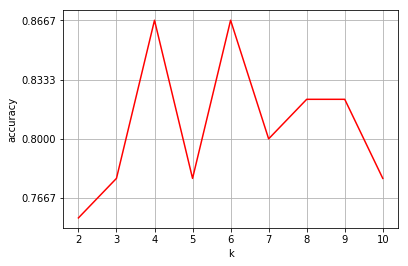

In [24]:
normal_accuracy = []  # Create an empty list of accuracy rates
k_value = range(2, 11)
for k in k_value:
    y_predict = sklearn_classify(x_train, y_train, x_test, k)
    accuracy = get_accuracy(y_test, y_predict)
    normal_accuracy.append(accuracy)

plt.xlabel("k")
plt.ylabel("accuracy")
new_ticks = np.linspace(0.6, 0.9, 10)  # Set the y-axis display
plt.yticks(new_ticks)
plt.plot(k_value, normal_accuracy, c='r')
plt.grid(True)  # Add grid

It can be observed that when `K=4` and when `K=6`, the model accuracy is equivalent. But in order to choose the optimal model, we consider the generalization ability of the model. So, here we choose `K=4`, which is a simpler model.

## Kd Tree

The KNN algorithm is easy to understand, largely because the method used to classify the inputs is a linear scan, i.e., the input is the distance calculated with each of the training samples. Due to this, such calculations can be very time consuming when the amount of data is particularly large. In order to improve the efficiency of KNN search and to reduce the number of calculation distances, here we introduce a Kd tree.

#### Brief Introduction To Kd Tree

In computer science, a Kd tree (short for K-dimensional tree) is a space-partitioning data structure for organizing points in a k-dimensional space. Kd trees are a useful data structure for several applications, such as searches involving a multidimensional search key (e.g., range searches and nearest neighbor searches). Kd trees are a special case of binary space-partitioning trees. Every node of the Kd tree corresponds to a K-dimensional super-rectangular region. Kd trees can be used to eliminate the search for most of the data points, thus reducing the amount of calculations:

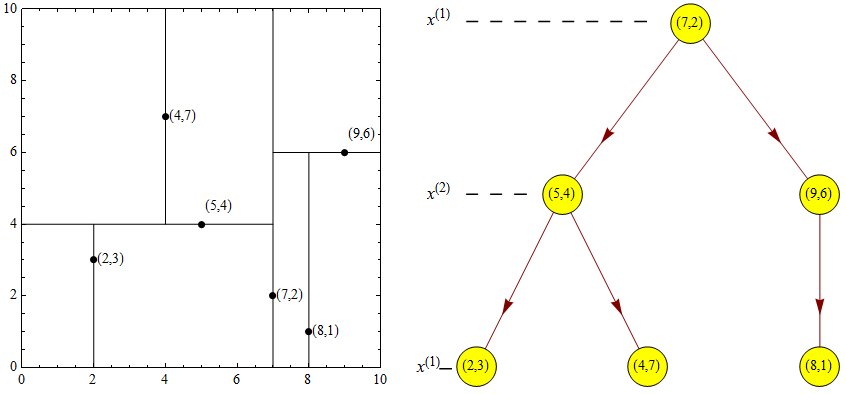

In [25]:
Image("../input/week4images/K-Nearest Neighbor Algorithm 5.png", width="1000px")

#### Nearest Neighbour Search for Kd Tree

The nearest neighbour (NN) search algorithm aims to find the point in a tree that is nearest to a given input point. This search can be done efficiently by using the tree properties to quickly eliminate large portions of the search space. <br>
<br>
Searching for the nearest neighbour in a Kd tree proceeds as follows ([Wikipedia](https://en.wikipedia.org/wiki/K-d_tree)): <br>
<br>
1. Starting with the root node, the algorithm moves down the tree recursively, in the same way that it would if the search point were being inserted (i.e., it goes left or right depending on whether the point is less than or greater than the current node in the split dimension).  <br>
  <br>
2. Once the algorithm reaches a leaf node, it saves that node point as the "current best".<br>
  <br>
3. The algorithm unwinds the recursion of the tree, performing the following steps at every node:<br>
(a.) If the current node is closer than the current best, then it becomes the current best.<br>
(b.) The algorithm checks whether there could be any points on the other side of the splitting plane that are closer to the search point than the current best. <br>
4. When the algorithm finishes this process for the root node, then the search is complete.

Generally the algorithm uses squared distances for comparison to avoid computing square roots. Additionally, it can save computation by holding the squared current best distance in a variable for comparison. 

#### Implementation of Kd Tree

In the previous explanation, the main purpose of the Kd tree is to improve the speed of data search and reduce the memory and time consumption. Below we use the code to intuitively experience the advantages of the Kd tree. Implementing the Kd tree with the scikit-learn library is quite simple: We just need to pass the `kd_tree` parameter when the function is called:

In [26]:
"""
Introduce the time function to calculate the running time of the program
"""

import time

#Without kd tree
time_start1 = time.time()
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
predict_label = knn.predict(x_test)
time_end1 = time.time()
print("normal_time:", time_end1-time_start1)

#With kd tree
time_start2 = time.time()
kd_knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
kd_knn.fit(x_train, y_train)
predict_label = knn.predict(x_test)
time_end2 = time.time()
print("kd_tree_time:", time_end2-time_start2)

normal_time: 0.008758783340454102
kd_tree_time: 0.008360862731933594


You may find that when the above code is run, occasionally there is a longer time cost to calculate using the Kd tree than without using the Kd tree. However, in most cases, the time cost using the Kd tree is shorter. The reason for this is that the dataset used here is small, and the division time may be not worthwhile when constructing the Kd tree structure. When the amount of data is larger, the overall search speed improvement effect is very obvious.

## Summary

In this chapter, we learned the principle and Python implementation of the KNN algorithm, and also completed the KNN algorithm using scikit-learn. Although the KNN algorithm is simple in concept, it performs very well in many classification or regression cases. The following knowledge points are included:<br>
<br>
- Principle of KNN algorithm<br>
- Common distance algorithm<br>
- Decision rules<br>
- Building prediction models with KNN<br>
- Kd tree<br>
- Implementing KNN with scikit-learn

---

<div style="color: #999;font-size: 12px;font-style: italic;">* Congratulations! You've completed Supervised Learning: Classification: K-Nearest Neighbour Algorithm.</div>